In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data=pd.read_csv('nike_data_2022_09.csv')
data.head(3)

,index,url,name,sub_title,brand,model,color,price,currency,availability,description,raw_description,avg_rating,review_count,images,available_sizes,uniq_id,scraped_at
0,0,https://www.nike.com/t/dri-fit-team-minnesota-...,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Nike,14226571,Navy,40.0,USD,InStock,SWEAT-WICKING COMFORT.The Nike Dri-FIT Team (M...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,S | M | L | XL | 2XL,c3229e54-aa58-5fdd-9f71-fbe66366b2b2,20/09/2022 23:32:28
1,1,https://www.nike.com/t/club-américa-womens-dri...,Club América,Women's Nike Dri-FIT Soccer Jersey Dress,Nike,13814665,Black/Black,90.0,USD,InStock,"Inspired by traditional soccer jerseys, the Cl...","<div class=""pi-pdpmainbody""><br/><p>Inspired b...",5.0,1.0,https://static.nike.com/a/images/t_PDP_1280_v1...,L (12–14),f8ebb2ed-17ae-5719-b750-5ea3ec69b75c,20/09/2022 23:32:40
2,2,https://www.nike.com/t/sportswear-swoosh-mens-...,Nike Sportswear Swoosh,Men's Overalls,Nike,13015648,Black/White,140.0,USD,OutOfStock,WORKING HARD TO KEEP YOU COMFORTABLE.The Nike ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",4.9,11.0,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,88120081-e6cb-5399-b9dc-a2d3d5dd5206,20/09/2022 23:33:16


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            112 non-null    int64  
 1   url              112 non-null    object 
 2   name             112 non-null    object 
 3   sub_title        112 non-null    object 
 4   brand            112 non-null    object 
 5   model            112 non-null    int64  
 6   color            110 non-null    object 
 7   price            112 non-null    float64
 8   currency         112 non-null    object 
 9   availability     108 non-null    object 
 10  description      112 non-null    object 
 11  raw_description  112 non-null    object 
 12  avg_rating       23 non-null     float64
 13  review_count     23 non-null     float64
 14  images           108 non-null    object 
 15  available_sizes  56 non-null     object 
 16  uniq_id          112 non-null    object 
 17  scraped_at      

In [9]:
data['color'].value_counts()

Black                        15
White                         9
Navy                          3
Black/White                   3
Multi-Color                   3
                             ..
Charcoal Heather/Red          1
Black/Black/Black             1
Black/Black                   1
Multi-Color/Lavender Mist     1
Orange                        1
Name: color, Length: 76, dtype: int64

In [ ]:
data.groupby[('name','model')].price.ag

<AxesSubplot:xlabel='avg_rating'>

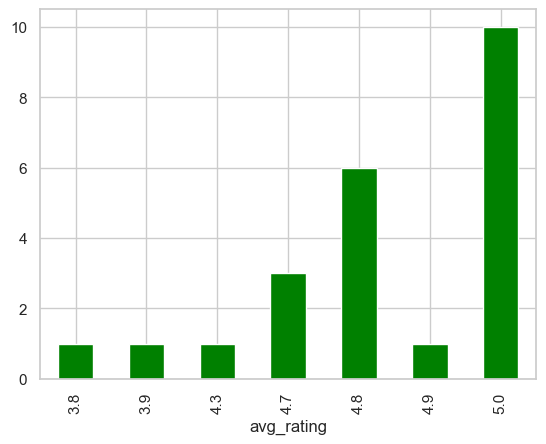

In [58]:
data.groupby('avg_rating').price.count().plot(kind='bar',color='green')

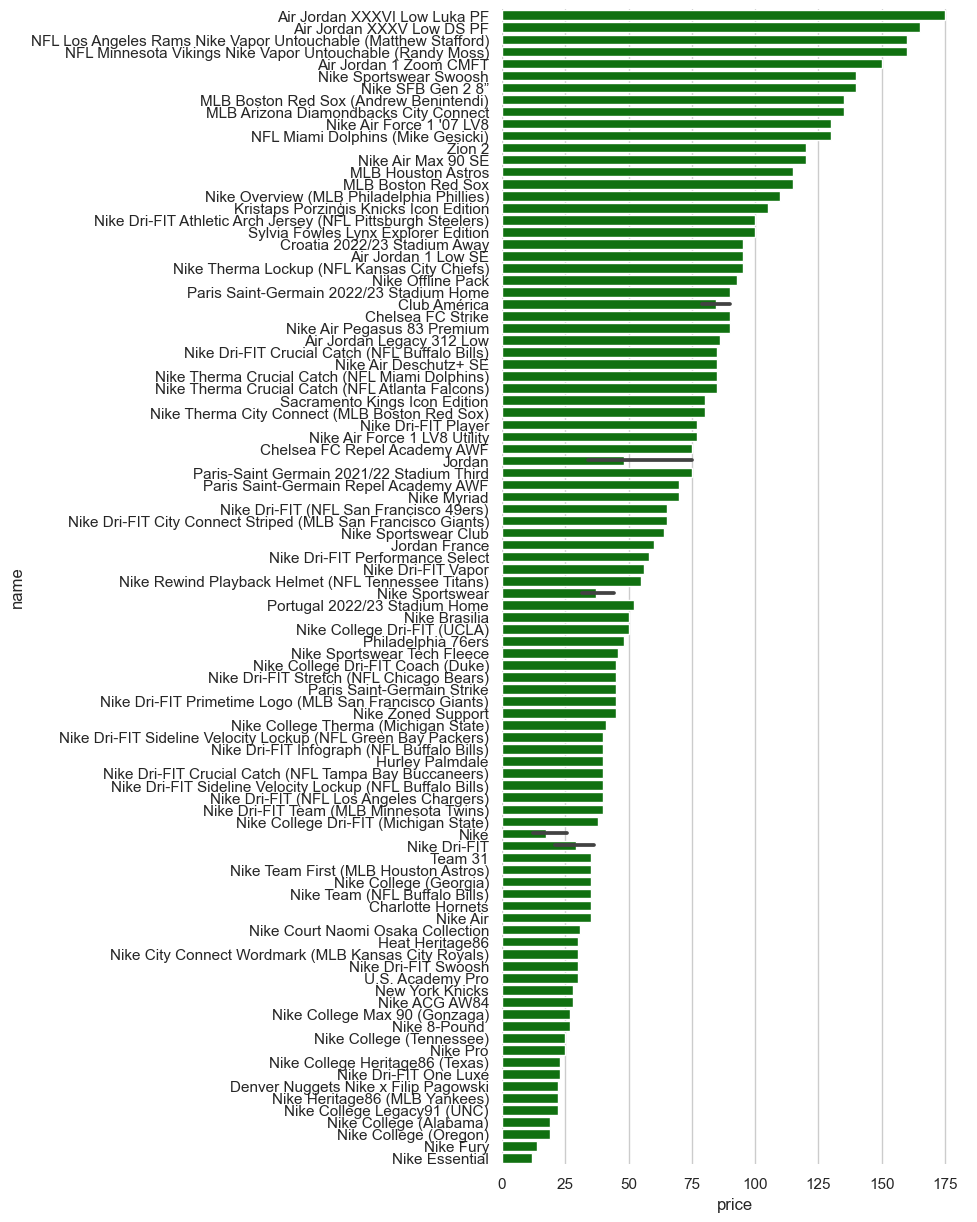

In [59]:
df_sorted=data.sort_values("price", ascending=False)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="price", y="name", data=df_sorted,
            label="Price of nike", color="green")
sns.despine(left=True, bottom=True)

# Continue....